In [4]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install matplotlib
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Load the dataset
df = pd.read_csv(r"C:\Users\vinay\Downloads\student-mat.csv", delimiter=';')

In [21]:
# Display first few rows
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [22]:
# Data Exploration
print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nData types of each column:")
print(df.dtypes)

print("\nDataset shape (rows, columns):", df.shape)


Missing values in each column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Data types of each column:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object


In [23]:
# Data Cleaning
# Handling missing values by replacing them with the median value
df.fillna(df.select_dtypes(include=[np.number]).median(), inplace=True)

# Removing duplicate entries
df.drop_duplicates(inplace=True)

In [24]:
# Data Analysis
average_g3 = df['G3'].mean()
print("\nAverage final grade (G3):", average_g3)

students_above_15 = df[df['G3'] > 15].shape[0]
print("Number of students scoring above 15 in G3:", students_above_15)

correlation = df[['studytime', 'G3']].corr().iloc[0,1]
print("Correlation between study time and final grade (G3):", correlation)

average_g3_by_gender = df.groupby('sex')['G3'].mean()
print("\nAverage G3 by gender:")
print(average_g3_by_gender)


Average final grade (G3): 10.415189873417722
Number of students scoring above 15 in G3: 40
Correlation between study time and final grade (G3): 0.09781968965319622

Average G3 by gender:
sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


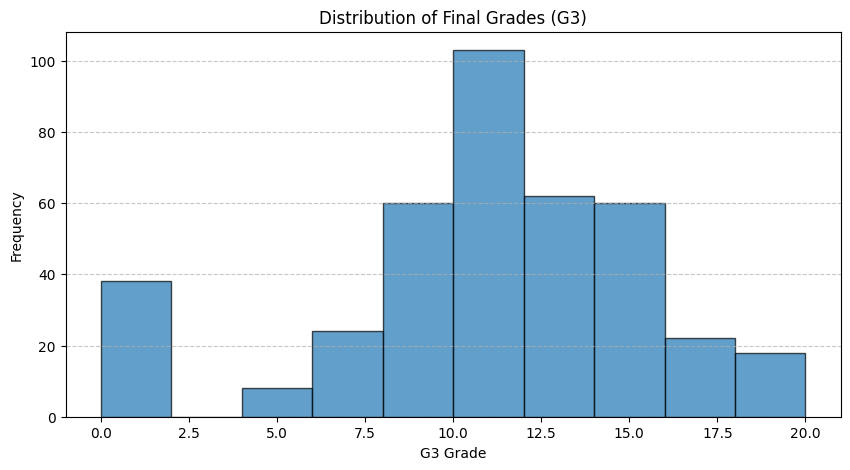

In [25]:
# Data Visualization
# Histogram of final grades (G3)
plt.figure(figsize=(10, 5))
plt.hist(df['G3'], bins=10, edgecolor='black', alpha=0.7)
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("G3 Grade")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

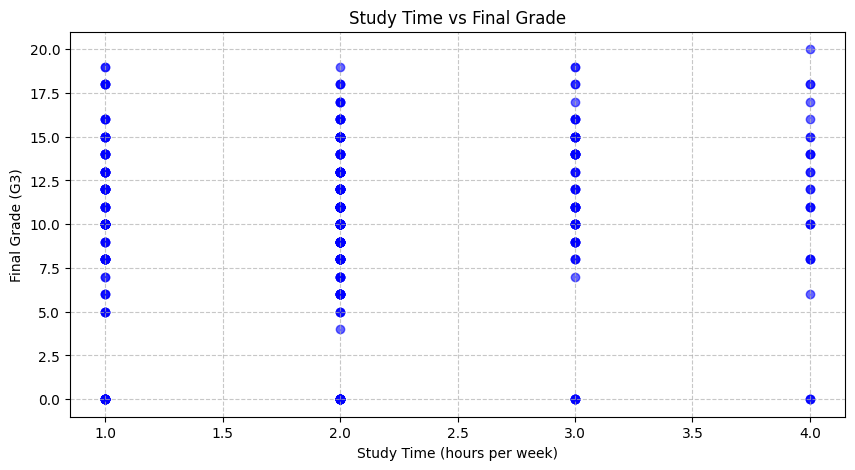

In [26]:
# Scatter plot between study time and final grade
plt.figure(figsize=(10, 5))
plt.scatter(df['studytime'], df['G3'], alpha=0.6, color='blue')
plt.title("Study Time vs Final Grade")
plt.xlabel("Study Time (hours per week)")
plt.ylabel("Final Grade (G3)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

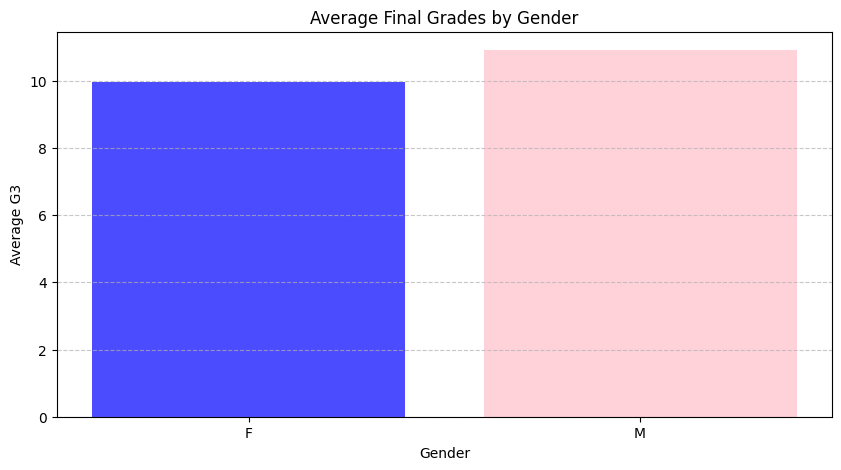

In [27]:
# Bar chart comparing the average scores of male and female students
plt.figure(figsize=(10, 5))
plt.bar(average_g3_by_gender.index, average_g3_by_gender.values, color=['blue', 'pink'], alpha=0.7)
plt.title("Average Final Grades by Gender")
plt.xlabel("Gender")
plt.ylabel("Average G3")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()